In [1]:
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_train = pd.read_csv('dacon_real_perfect_train.csv',encoding = 'UTF-8')
df_train

,transaction_year,transaction_month,transaction_date1,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,...,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,household_loan,mean_loan,mortgage loan
0,2006,1,11,0,5584,1,1999,47.4300,6,37.585965,...,91120,65.63,46,1.0,1.0,corridor,215000000,5.69,5.79,5.64
1,2006,1,11,1,5584,1,1999,44.3700,8,37.585965,...,91119,61.39,10,2.0,1.0,corridor,200000000,5.69,5.79,5.64
2,2006,1,11,2,5059,1,1992,54.7000,8,37.580511,...,8430,72.36,201,2.0,1.0,corridor,168000000,5.69,5.79,5.64
3,2006,1,11,3,2816,1,1993,64.6600,11,37.580324,...,5839,87.30,284,2.0,1.0,corridor,165000000,5.69,5.79,5.64
4,2006,1,11,4,2816,1,1993,106.6200,7,37.580324,...,5836,127.74,112,4.0,2.0,stairway,280000000,5.69,5.79,5.64
5,2006,1,11,5,2815,1,2000,84.9200,9,37.575381,...,5831,109.88,454,3.0,2.0,stairway,415000000,5.69,5.79,5.64
6,2006,1,11,6,2815,1,2000,60.0000,13,37.575381,...,5833,84.33,207,3.0,1.0,corridor,267000000,5.69,5.79,5.64
7,2006,1,11,7,9867,1,2005,84.7600,10,37.559200,...,11862,104.30,82,3.0,2.0,stairway,415000000,5.69,5.79,5.64
8,2006,1,11,8,2818,1,1999,84.8800,18,37.555060,...,5843,107.65,576,3.0,2.0,stairway,310000000,5.69,5.79,5.64
9,2006,1,11,9,2817,1,2002,59.9400,12,37.549828,...,5842,85.90,864,3.0,1.0,corridor,319000000,5.69,5.79,5.64


In [20]:
len(df_train)

1601458

In [5]:
df_train.isna().sum()

transaction_year                          0
transaction_month                         0
transaction_date1                         0
key                                       0
apartment_id                              0
city                                      0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                      

In [6]:
len(df_train[df_train['heat_fuel']=="-"])

8971

In [7]:
len(df_train[df_train['heat_fuel'].isna()==True])

9667

In [8]:
df_train.dtypes

transaction_year                        int64
transaction_month                       int64
transaction_date1                       int64
key                                     int64
apartment_id                            int64
city                                    int64
year_of_completion                      int64
exclusive_use_area                    float64
floor                                   int64
latitude                              float64
longitude                             float64
address_by_law                          int64
total_parking_capacity_in_site        float64
total_household_count_in_sites          int64
apartment_building_count_in_sites       int64
tallest_building_in_sites             float64
lowest_building_in_sites              float64
heat_type                              object
heat_fuel                              object
room_id                                 int64
supply_area                           float64
total_household_count_of_area_type

In [9]:
df_train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,transaction_year,transaction_month,transaction_date1,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,transaction_real_price,household_loan,mean_loan,mortgage loan
transaction_year,1.0,-0.066,0.0029,0.99,0.19,0.078,0.16,0.073,0.033,0.076,-0.078,-0.077,0.023,0.042,0.059,0.071,0.022,0.015,0.084,-0.038,0.015,0.024,0.29,-0.9,-0.92,-0.91
transaction_month,-0.066,1.0,-0.0097,0.011,0.021,-0.026,0.018,0.014,0.0086,-0.025,0.026,0.025,0.0092,0.0098,0.0061,0.017,0.0098,0.0045,0.017,0.003,-0.00021,-0.00038,0.0023,-0.02,-0.013,-0.01
transaction_date1,0.0029,-0.0097,1.0,0.0056,0.005,0.0021,0.0057,0.0049,0.0031,0.002,-0.0019,-0.0021,0.0019,0.0031,0.0025,0.0069,0.0053,0.0023,0.0058,-0.0011,0.0019,0.0021,0.011,-0.0027,-0.003,-0.0029
key,0.99,0.011,0.0056,1.0,0.19,0.083,0.16,0.071,0.033,0.082,-0.083,-0.082,0.022,0.042,0.058,0.07,0.02,0.015,0.082,-0.037,0.014,0.024,0.3,-0.89,-0.92,-0.88
apartment_id,0.19,0.021,0.005,0.19,1.0,-0.17,0.64,0.16,0.097,-0.17,0.17,0.17,0.062,0.027,0.088,0.22,0.13,0.26,0.2,-0.18,0.037,0.088,0.16,-0.16,-0.17,-0.17
city,0.078,-0.026,0.0021,0.083,-0.17,1.0,-0.078,-0.088,-0.15,1.0,-1.0,-1.0,-0.043,0.1,0.15,-0.25,-0.3,-0.29,-0.092,0.023,-0.021,-0.011,0.4,-0.095,-0.099,-0.087
year_of_completion,0.16,0.018,0.0057,0.16,0.64,-0.078,1.0,0.24,0.26,-0.079,0.073,0.077,-0.079,0.02,0.042,0.51,0.28,0.15,0.32,-0.12,0.067,0.12,0.13,-0.14,-0.14,-0.14
exclusive_use_area,0.073,0.014,0.0049,0.071,0.16,-0.088,0.24,1.0,0.17,-0.094,0.089,0.089,0.031,-0.02,0.019,0.29,0.22,0.048,0.98,-0.15,0.23,0.14,0.52,-0.073,-0.072,-0.076
floor,0.033,0.0086,0.0031,0.033,0.097,-0.15,0.26,0.17,1.0,-0.15,0.15,0.15,0.047,0.12,0.013,0.54,0.44,0.11,0.22,0.032,0.024,0.03,0.13,-0.028,-0.028,-0.03
latitude,0.076,-0.025,0.002,0.082,-0.17,1.0,-0.079,-0.094,-0.15,1.0,-0.99,-1.0,-0.044,0.1,0.15,-0.25,-0.3,-0.3,-0.097,0.023,-0.023,-0.012,0.39,-0.094,-0.097,-0.085


In [10]:
set(df_train['heat_fuel'])

{'-', 'cogeneration', 'gas', nan}

In [11]:
df_train['heat_fuel'].value_counts()

gas             1204679
cogeneration     378141
-                  8971
Name: heat_fuel, dtype: int64

In [19]:
1204679+378141+8971+9667

1601458

In [25]:
fill_heat_fuel.columns

Index(['-', 'cogeneration', 'gas'], dtype='object', name='heat_fuel')

In [51]:
fill_heat_fuel=pd.crosstab(df_train.year_of_completion, df_train.heat_fuel, margins=False)
fill_heat_fuel=fill_heat_fuel.reset_index()

In [52]:
fill_heat_fuel.head()

heat_fuel,year_of_completion,-,cogeneration,gas
0,1962,177,0,42
1,1966,0,0,43
2,1968,0,0,113
3,1969,43,0,55
4,1970,0,0,329


In [53]:
fill_heat_fuel[fill_heat_fuel['cogeneration']>=fill_heat_fuel['gas']]

heat_fuel,year_of_completion,-,cogeneration,gas
5,1971,0,1192,961
12,1978,433,6824,3695
22,1988,103,41802,27547
42,2008,0,35547,33468


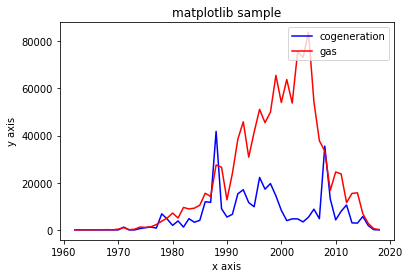

In [54]:
from matplotlib import pyplot as plt
import numpy as np

x=fill_heat_fuel['year_of_completion']
y_con = fill_heat_fuel['cogeneration']
y_gas = fill_heat_fuel['gas']

plt.plot(x,y_con,'b',label='cogeneration')
plt.plot(x,y_gas,'r',label='gas')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()



In [81]:
heat_fuel_na1=df_train[df_train['heat_fuel']=="-"]
heat_fuel_na2=df_train[df_train['heat_fuel'].isna()==True]

In [82]:
heat_fuel_na=pd.concat([heat_fuel_na1,heat_fuel_na2],axis=0)
heat_fuel_na=heat_fuel_na.reset_index()

In [83]:
type(heat_fuel_na['year_of_completion'][0])

numpy.int64

In [84]:
list_con_year=[1971,1978,1988,2008]

In [85]:
for i in range(len(heat_fuel_na)):
    if heat_fuel_na['year_of_completion'][i] in list_con_year:
        heat_fuel_na['heat_fuel'][i]="cogeneration"
    else:
        heat_fuel_na['heat_fuel'][i]="gas"
    if i%100==0:
        print(i)


C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0


C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [86]:
del heat_fuel_na['index']

In [87]:
heat_fuel_na['year_of_completion'].value_counts()

1993    3163
2001    2632
2015    1606
1998    1035
1994    1017
1990     924
2000     902
1995     859
1992     788
1986     604
1982     589
1991     550
1983     433
1978     433
2017     367
1988     347
1984     301
2016     286
1974     262
1997     239
1989     221
1962     177
1999     172
1977     169
1987     130
1985     106
1976     101
1996      95
1981      46
1969      43
2018      41
Name: year_of_completion, dtype: int64

In [91]:
heat_fuel_na.isna().sum()

transaction_year                         0
transaction_month                        0
transaction_date1                        0
key                                      0
apartment_id                             0
city                                     0
year_of_completion                       0
exclusive_use_area                       0
floor                                    0
latitude                                 0
longitude                                0
address_by_law                           0
total_parking_capacity_in_site           0
total_household_count_in_sites           0
apartment_building_count_in_sites        0
tallest_building_in_sites                0
lowest_building_in_sites                 0
heat_type                             2017
heat_fuel                                0
room_id                                  0
supply_area                              0
total_household_count_of_area_type       0
room_count                               0
bathroom_co

In [96]:
heat_fuel_no_na=df_train[df_train['heat_fuel'].isna()==False]

In [98]:
df_train=pd.merge(heat_fuel_no_na,heat_fuel_na,how='outer',on=['transaction_year', 'transaction_month', 'transaction_date1', 'key',
       'apartment_id', 'city', 'year_of_completion', 'exclusive_use_area',
       'floor', 'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'household_loan', 'mean_loan', 'mortgage loan'])

In [99]:
df_train.isna().sum()

transaction_year                          0
transaction_month                         0
transaction_date1                         0
key                                       0
apartment_id                              0
city                                      0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                              2017
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                      

In [101]:
len(df_train)

1610429

In [104]:
df_train[df_train['heat_fuel'].isna()==False]

,transaction_year,transaction_month,transaction_date1,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,...,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,household_loan,mean_loan,mortgage loan
0,2006,1,11,0,5584,1,1999,47.4300,6,37.585965,...,91120,65.63,46,1.0,1.0,corridor,215000000,5.69,5.79,5.64
1,2006,1,11,1,5584,1,1999,44.3700,8,37.585965,...,91119,61.39,10,2.0,1.0,corridor,200000000,5.69,5.79,5.64
2,2006,1,11,2,5059,1,1992,54.7000,8,37.580511,...,8430,72.36,201,2.0,1.0,corridor,168000000,5.69,5.79,5.64
3,2006,1,11,3,2816,1,1993,64.6600,11,37.580324,...,5839,87.30,284,2.0,1.0,corridor,165000000,5.69,5.79,5.64
4,2006,1,11,4,2816,1,1993,106.6200,7,37.580324,...,5836,127.74,112,4.0,2.0,stairway,280000000,5.69,5.79,5.64
5,2006,1,11,5,2815,1,2000,84.9200,9,37.575381,...,5831,109.88,454,3.0,2.0,stairway,415000000,5.69,5.79,5.64
6,2006,1,11,6,2815,1,2000,60.0000,13,37.575381,...,5833,84.33,207,3.0,1.0,corridor,267000000,5.69,5.79,5.64
7,2006,1,11,7,9867,1,2005,84.7600,10,37.559200,...,11862,104.30,82,3.0,2.0,stairway,415000000,5.69,5.79,5.64
8,2006,1,11,8,2818,1,1999,84.8800,18,37.555060,...,5843,107.65,576,3.0,2.0,stairway,310000000,5.69,5.79,5.64
9,2006,1,11,9,2817,1,2002,59.9400,12,37.549828,...,5842,85.90,864,3.0,1.0,corridor,319000000,5.69,5.79,5.64


In [105]:
heat_fuel_no_na1=df_train[df_train['heat_fuel'].isna()==False]
heat_fuel_no_na=heat_fuel_no_na1[heat_fuel_no_na1['heat_fuel']!="-"]

In [109]:
len(heat_fuel_no_na)

1601458

In [114]:
heat_fuel_no_na

,transaction_year,transaction_month,transaction_date1,key,apartment_id,city,year_of_completion,exclusive_use_area,floor,latitude,...,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,household_loan,mean_loan,mortgage loan
0,2006,1,11,0,5584,1,1999,47.4300,6,37.585965,...,91120,65.63,46,1.0,1.0,corridor,215000000,5.69,5.79,5.64
1,2006,1,11,1,5584,1,1999,44.3700,8,37.585965,...,91119,61.39,10,2.0,1.0,corridor,200000000,5.69,5.79,5.64
2,2006,1,11,2,5059,1,1992,54.7000,8,37.580511,...,8430,72.36,201,2.0,1.0,corridor,168000000,5.69,5.79,5.64
3,2006,1,11,3,2816,1,1993,64.6600,11,37.580324,...,5839,87.30,284,2.0,1.0,corridor,165000000,5.69,5.79,5.64
4,2006,1,11,4,2816,1,1993,106.6200,7,37.580324,...,5836,127.74,112,4.0,2.0,stairway,280000000,5.69,5.79,5.64
5,2006,1,11,5,2815,1,2000,84.9200,9,37.575381,...,5831,109.88,454,3.0,2.0,stairway,415000000,5.69,5.79,5.64
6,2006,1,11,6,2815,1,2000,60.0000,13,37.575381,...,5833,84.33,207,3.0,1.0,corridor,267000000,5.69,5.79,5.64
7,2006,1,11,7,9867,1,2005,84.7600,10,37.559200,...,11862,104.30,82,3.0,2.0,stairway,415000000,5.69,5.79,5.64
8,2006,1,11,8,2818,1,1999,84.8800,18,37.555060,...,5843,107.65,576,3.0,2.0,stairway,310000000,5.69,5.79,5.64
9,2006,1,11,9,2817,1,2002,59.9400,12,37.549828,...,5842,85.90,864,3.0,1.0,corridor,319000000,5.69,5.79,5.64


In [110]:
df_train.isna().sum()

transaction_year                          0
transaction_month                         0
transaction_date1                         0
key                                       0
apartment_id                              0
city                                      0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                              2017
heat_fuel                                 0
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                      

In [111]:
heat_fuel=pd.concat([heat_fuel_na,heat_fuel_no_na],axis=0)

In [112]:
len(heat_fuel)

1620096

In [118]:
max(set(heat_fuel_no_na['key']))

1605373

In [100]:
heat_fuel_no_na.to_csv("heat_fuel_perfect.csv", encoding='utf-8', index=False)

# 이거저장하기

In [95]:
df_train.isna().sum()

transaction_year                          0
transaction_month                         0
transaction_date1                         0
key                                       0
apartment_id                              0
city                                      0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site            0
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 0
lowest_building_in_sites                  0
heat_type                              4034
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                      

In [68]:
set(df_train['heat_type'])

{'central', 'district', 'individual', nan}

In [89]:
df_train['heat_type'].value_counts()

individual    1085870
district       379822
central        133749
Name: heat_type, dtype: int64

In [ ]:
fill_heat_fuel=pd.crosstab(df_train.year_of_completion, df_train.heat_fuel, margins=False)
fill_heat_fuel=fill_heat_fuel.reset_index()